# Aggregate data

In [1]:
from csv import reader
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline  

data = {}
dataset_path = '../data/2015/'

missing = 0
# Load Accidents.csv
i = 0
with open(dataset_path+'Accidents.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_District,Local_Authority_Highway,_1st_Road_Class,_1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,_2nd_Road_Class,_2nd_Road_Number,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location = line
            
            if Longitude and Latitude:
                data[Accident_Index] = {'Location_Easting_OSGR':Location_Easting_OSGR,'Location_Northing_OSGR':Location_Northing_OSGR,'Longitude':Longitude, 'Latitude':Latitude, 'Police_Force':Police_Force, 'Accident_Severity':Accident_Severity, 'Number_of_Vehicles':Number_of_Vehicles, 'Number_of_Casualties':Number_of_Casualties, 'Date':Date, 'Day_of_Week':int(Day_of_Week), 'Time':Time, 'Local_Authority_District':Local_Authority_District, 'Local_Authority_Highway':Local_Authority_Highway, '_1st_Road_Class':_1st_Road_Class, '_1st_Road_Number':_1st_Road_Number, 'Road_Type':Road_Type, 'Speed_limit':Speed_limit, 'Junction_Detail':Junction_Detail, 'Junction_Control':Junction_Control, '_2nd_Road_Class':_2nd_Road_Class, '_2nd_Road_Number':_2nd_Road_Number, 'Pedestrian_Crossing_Human_Control':Pedestrian_Crossing_Human_Control, 'Pedestrian_Crossing_Physical_Facilities':Pedestrian_Crossing_Physical_Facilities, 'Light_Conditions':int(Light_Conditions), 'Weather_Conditions':int(Weather_Conditions), 'Road_Surface_Conditions':Road_Surface_Conditions, 'Special_Conditions_at_Site':Special_Conditions_at_Site, 'Carriageway_Hazards':Carriageway_Hazards, 'Urban_or_Rural_Area':Urban_or_Rural_Area, 'Did_Police_Officer_Attend_Scene_of_Accident':Did_Police_Officer_Attend_Scene_of_Accident, 'LSOA_of_Accident_Location':LSOA_of_Accident_Location}
            else:
                missing += 1
        i+=1

# Load Casualties.csv
i = 0 
with open(dataset_path+'Casualties.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile = line
            
            if data.has_key(Accident_Index):
                data[Accident_Index].update({'Vehicle_Reference':Vehicle_Reference, 'Casualty_Reference':Casualty_Reference, 'Casualty_Class':Casualty_Class, 'Sex_of_Casualty':Sex_of_Casualty, 'Age_of_Casualty':Age_of_Casualty, 'Age_Band_of_Casualty':Age_Band_of_Casualty, 'Casualty_Severity':int(Casualty_Severity), 'Pedestrian_Location':Pedestrian_Location, 'Pedestrian_Movement':Pedestrian_Movement, 'Car_Passenger':Car_Passenger, 'Bus_or_Coach_Passenger':Bus_or_Coach_Passenger, 'Pedestrian_Road_Maintenance_Worker':Pedestrian_Road_Maintenance_Worker, 'Casualty_Type':Casualty_Type, 'Casualty_Home_Area_Type':Casualty_Home_Area_Type, 'Casualty_IMD_Decile':Casualty_IMD_Decile})
            else:
                missing += 1
        i+=1

        
# Load Vehicles.csv
i = 0 
with open(dataset_path+'Vehicles.csv', 'rb') as csvfile:
    for line in reader(csvfile, delimiter=','):
        if(i==0):
            pass
        else:
            Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location_Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,_1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity,Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile = line

            if data.has_key(Accident_Index):
                data[Accident_Index].update({'Vehicle_Reference':Vehicle_Reference, 'Vehicle_Type':Vehicle_Type, 'Towing_and_Articulation':Towing_and_Articulation, 'Vehicle_Manoeuvre':Vehicle_Manoeuvre, 'Vehicle_Location_Restricted_Lane':Vehicle_Location_Restricted_Lane, 'Junction_Location':Junction_Location, 'Skidding_and_Overturning':Skidding_and_Overturning, 'Hit_Object_in_Carriageway':Hit_Object_in_Carriageway, 'Vehicle_Leaving_Carriageway':Vehicle_Leaving_Carriageway, 'Hit_Object_off_Carriageway':Hit_Object_off_Carriageway, '_1st_Point_of_Impact':_1st_Point_of_Impact, 'Was_Vehicle_Left_Hand_Drive':Was_Vehicle_Left_Hand_Drive, 'Journey_Purpose_of_Driver':Journey_Purpose_of_Driver, 'Sex_of_Driver':Sex_of_Driver, 'Age_of_Driver':Age_of_Driver, 'Age_Band_of_Driver':Age_Band_of_Driver, 'Engine_Capacity':Engine_Capacity, 'Propulsion_Code':Propulsion_Code, 'Age_of_Vehicle':Age_of_Vehicle, 'Driver_IMD_Decile':Driver_IMD_Decile, 'Driver_Home_Area_Type':Driver_Home_Area_Type, 'Vehicle_IMD_Decile':Vehicle_IMD_Decile})
            else:
                missing += 1
        i+=1


print "Number of features: ", len(data[data.keys()[0]].keys())
print "Number of accidents: ", len(data.keys()) 
print "Discarder accidents (because of incompleteness): ", missing

Number of features:  67
Number of accidents:  140016
Discarder accidents (because of incompleteness):  395


# Heat map - all accidents

In [114]:
from geoplotlib.utils import BoundingBox
import geoplotlib

min_lat = 51
max_lat = 58
min_lon = 0
max_lon = -6

latitudes  = [float(entry["Latitude"])  for entry in data.values()]
longitudes = [float(entry["Longitude"]) for entry in data.values()]

bbox = BoundingBox(north=max_lat, south=min_lat, west=min_lon, east=max_lon)
geoplotlib.set_bbox(bbox)

geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

geoplotlib.kde(geo_data_for_plotting, bw=[0,0.125])
geoplotlib.inline()
# geoplotlib.show()


('smallest non-zero count', 1.2664165549093855e-14)
('max count:', 288.99999999999852)


# Heat map - fatal accidents

In [115]:
from geoplotlib.utils import BoundingBox
import geoplotlib

min_lat = 51
max_lat = 58
min_lon = 0
max_lon = -6

latitudes  = [float(entry["Latitude"])  for entry in data.values() if int(entry['Accident_Severity'])==1]
longitudes = [float(entry["Longitude"]) for entry in data.values() if int(entry['Accident_Severity'])==1]

bbox = BoundingBox(north=max_lat, south=min_lat, west=min_lon, east=max_lon)
geoplotlib.set_bbox(bbox)

geo_data_for_plotting = {"lat": latitudes,
                         "lon": longitudes}

geoplotlib.kde(geo_data_for_plotting, bw=[1,0.3])
geoplotlib.inline()
# geoplotlib.show()


('smallest non-zero count', 5.134089112765776e-07)
('max count:', 1.7859312520568118)


We can immediatelly notice that most of the accidents are in and around the cities, whereas deadly ones are more equally spreaded across the country (North of the country is not that densly inhabited)

# Accidents per hour

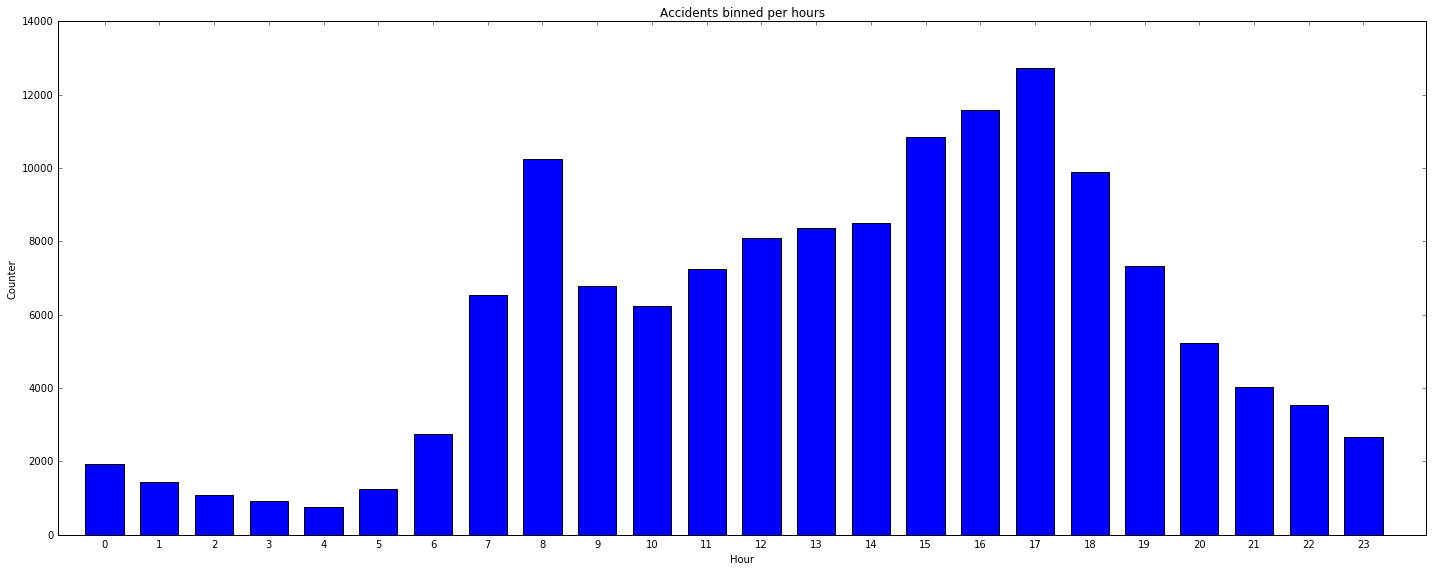

In [139]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

hours = np.arange(0,24)
hourly_accidents_counter = dict((hour,0) for hour in hours)

for accident in data.values():
    if accident["Time"] != "":
        hour = int( accident["Time"].split(":")[0] )
        hourly_accidents_counter[hour] += 1
        
# Generate the plot
width = 0.7
indices = hours + 0.5
plt.figure(figsize=(20,8))
labels = hourly_accidents_counter.keys()

plt.bar(indices, hourly_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents binned per hours")
plt.xlabel('Hour')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per month

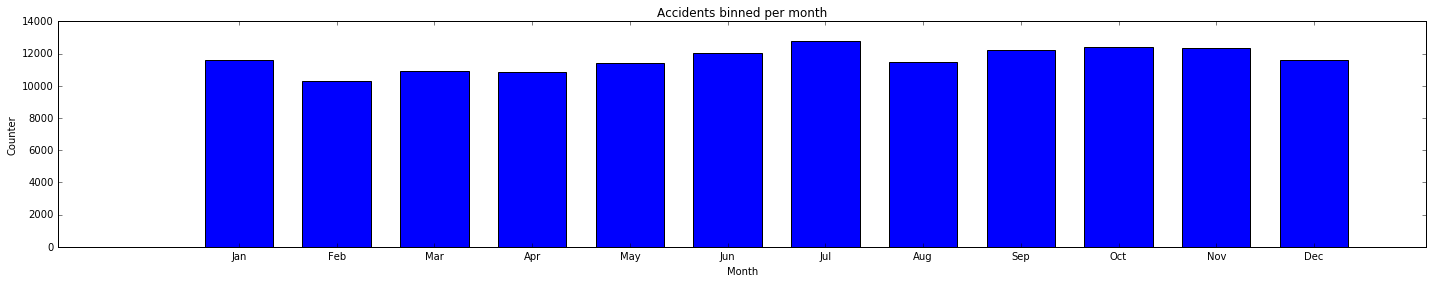

In [162]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

months = np.arange(1,13)
monthly_accidents_counter = dict((month,0) for month in months)

for accident in data.values():
    if accident["Date"] != "":
        month = int( accident["Date"].split("/")[-2])
        monthly_accidents_counter[month] += 1
        
# Generate the plot
width = 0.7
indices = months + 0.5
plt.figure(figsize=(20,4))
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.bar(indices, monthly_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents binned per month")
plt.xlabel('Month')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per sex

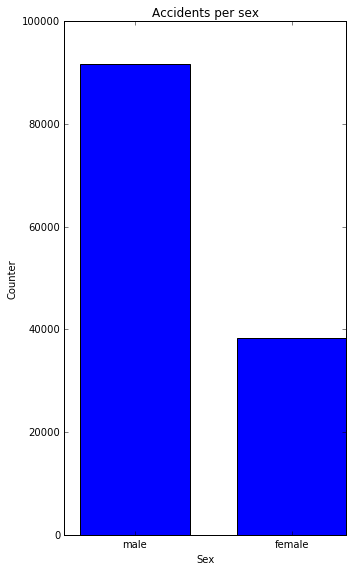

In [179]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

sexes = np.arange(1,3)
sex_accidents_counter = dict((sex,0) for sex in sexes)

for accident in data.values():
    if accident.has_key('Sex_of_Driver'):
        sex = int(accident['Sex_of_Driver'])
        if sex in [1,2]:
            sex_accidents_counter[sex] += 1
        
# Generate the plot
width = 0.7
indices = sexes + 0.5
plt.figure(figsize=(5,8))
labels = ['male','female']

plt.bar(indices, sex_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents per sex")
plt.xlabel('Sex')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()

# Accidents per age (binned)

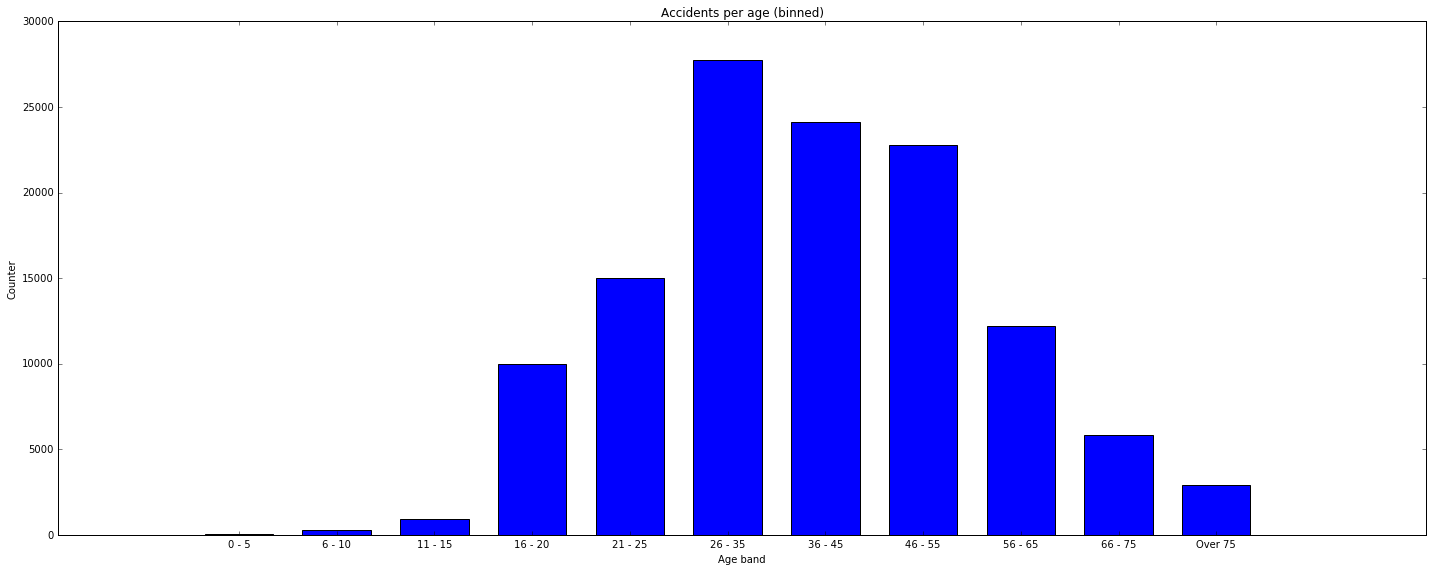

In [186]:
import numpy as np
import random
from __future__ import division
from matplotlib import pyplot as plt 
import matplotlib.ticker as mtick
%matplotlib inline  

labels = [
        "0 - 5",
        "6 - 10",
        "11 - 15",
        "16 - 20",
        "21 - 25",
        "26 - 35",
        "36 - 45",
        "46 - 55",
        "56 - 65",
        "66 - 75",
        "Over 75"]

binnes = np.arange(1,(len(labels)+1))
age_accidents_counter = dict((group,0) for group in binnes)

for accident in data.values():
    if accident.has_key('Age_Band_of_Driver'):
        age = int(accident['Age_Band_of_Driver'])
        if age != -1:
            age_accidents_counter[age] += 1
        
# Generate the plot
width = 0.7
indices = binnes + 0.5
plt.figure(figsize=(20,8))

plt.bar(indices, age_accidents_counter.values(), width)
plt.xticks(indices + width/2, labels, rotation='horizontal')
plt.title("Accidents per age (binned)")
plt.xlabel('Age band')
plt.ylabel('Counter')
plt.tight_layout(h_pad=1.0)
plt.show()



# Data preparation



In [13]:
import numpy as np
import random
from __future__ import division
from sklearn.neighbors import KNeighborsClassifier

hours = np.arange(0,24)
data_transformed = []

latitudes  = [float(entry["Latitude"])  for entry in data.values()]
longitudes = [float(entry["Longitude"]) for entry in data.values()]

max_lat = max(latitudes)
min_lat = min(latitudes)
max_lon = max(longitudes)
min_lon = min(longitudes)

n_lat = 1000
bins_lat = np.linspace(min_lat, max_lat, n_lat)
dist = bins_lat[1] - bins_lat[0]
bins_lon = np.arange(min_lon, max_lon, dist)
loc_counts = dict((hour,{}) for hour in hours)

for accident in data.values():
    if accident["Time"] != "":
        hour = int(accident["Time"].split(":")[0])
        latitude = min(bins_lat, key=lambda x:abs(x-float(accident["Latitude"])))
        longitude = min(bins_lon, key=lambda x:abs(x-float(accident["Longitude"])))
        
        if loc_counts[hour].has_key((latitude, longitude)):
            loc_counts[hour][(latitude, longitude)] += 1
        else:
            loc_counts[hour][(latitude, longitude)] = 1

matrix = []  
for hour,vals in loc_counts.iteritems():
    for loc, count in vals.iteritems():
        matrix.append([hour, loc[0], loc[1], count])

matrix = np.array(matrix)

with open('../docs/data/accidents_loc_time_1000.csv', 'wb') as f:
  f.write("hour,lat,lon,count\n")
  np.savetxt(f, matrix, delimiter=",", fmt='%2d, %1.10f, %1.10f, %d')
    
print "Done"

Done
